# Library

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' 

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Linear regression

## Parameters

In [4]:
batch_size, input_feature, output_feature = 100, 1, 1
lr = 1e-3
epoches = 500

## data

### load the data

In [5]:
train = pd.read_csv('data/linear_regression/train.csv')
test = pd.read_csv('data/linear_regression/test.csv')

In [6]:
train.shape
test.shape

(700, 2)

(300, 2)

In [7]:
train.head()
test.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


### Null

In [8]:
train.isnull().sum()
test.isnull().sum()

x    0
y    1
dtype: int64

x    0
y    0
dtype: int64

In [9]:
train[210:215]

,x,y
210,27.000000,24.582869
211,14.000000,12.125738
212,100.000000,100.015803
213,3530.157369,NaN
214,72.000000,74.046827


In [10]:
train.dropna(inplace=True) 

In [11]:
train.shape
train.isnull().sum()

(699, 2)

x    0
y    0
dtype: int64

In [12]:
# train.y = np.where(train.y.isnull() == True, train.x, train.y) 

### visualizing the data

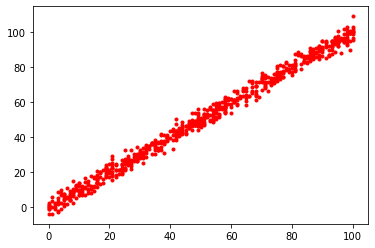

In [13]:
plt.plot(train.x, train.y, '.r') 

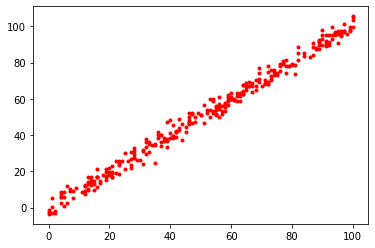

In [14]:
plt.plot(test.x, test.y, '.r') 

### To DataLoader

In [15]:
train_data = TensorDataset(torch.Tensor(train.x.to_numpy()), torch.Tensor(train.y)) 
test_data = TensorDataset(torch.Tensor(test.x.to_numpy()), torch.Tensor(test.y)) 

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True) 
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True) 

## build the model

In [16]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc = nn.Linear(input_feature, output_feature)
    def forward(self, t):
        t = self.fc(t)
        return t

In [17]:
network = Network()

In [18]:
Optimizer = optim.Adam(network.parameters(), lr=lr)
Loss_fn = torch.nn.MSELoss()  

## train the model

In [19]:
losses = []
for epoch in range(epoches):
    loss = 0.
    for batch_idx,(inputs, labels) in enumerate(train_loader):
        
        outputs = network(inputs.reshape(-1, 1)) 
        loss_batch = Loss_fn(outputs, labels.reshape(-1, 1))
        
        Optimizer.zero_grad()
        loss_batch.backward()
        Optimizer.step()
        
        loss += loss_batch.item()
        
    losses.append(loss/train.shape[0])
    
    if epoch%50 == 0:
        print(epoch, losses[epoch])

0 11.070951491807493
50 2.5750369616332485
100 0.3912835946581053
150 0.0970705629929964
200 0.07954958204888819
250 0.07911365260723152
300 0.07911808944396537
350 0.07908249788188798
400 0.07914957638632757
450 0.07909657651603819


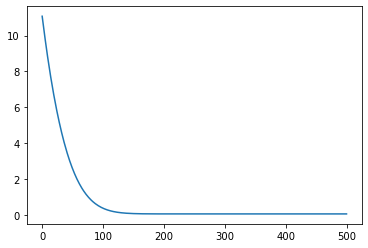

In [20]:
plt.plot(losses) # The loss curve

## test the model

In [21]:
outputs_pred = network(torch.Tensor(test.x).reshape(test.shape[0],-1))
loss = Loss_fn(outputs_pred, torch.Tensor(test.y).reshape(test.shape[0],-1))
loss.item()/test.shape[0]

0.03172900835673014

In [22]:
network.fc.bias
network.fc.weight

Parameter containing:
tensor([0.2229], requires_grad=True)

Parameter containing:
tensor([[0.9956]], requires_grad=True)

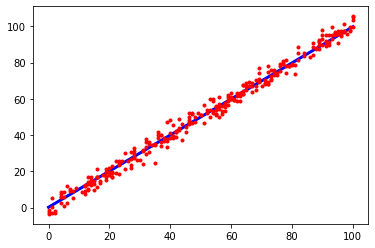

In [23]:
x = np.linspace(0, 100, 100)
y = network.fc.weight.item()*x + network.fc.bias.item()

plt.plot(x,y , color='blue', linewidth=3.0) # the prediction linear line
plt.plot(test.x, test.y, '.r') # the test dataset